In [ ]:
"""APPROACH TO LOAN PREDICTION 
1.Import all the necessary libraries.
2.load and audit the data.
3.data preparation and data transfromation.
  1.Missing value:Impute all missing values using mean,median and mode.
  2.Inconsistent values: Replace all inconsistencies with consistent values 
  3.outliers:Transform or let the algorithm deal 
4.Data Visualization.
5.Data Analysis.
  1.Uni-variate Analysis(mean,median,mode,skewness)
  2.Bi-variate Analysis(Correlation,Covariance,Chi square Test)
  3.Multi-variate Analysis
      1.Regression:not a regression problem
      2.Classification:Since outcome variable is yes or no
         1.Apply Logistic regression.
         2.Apply Decision tree.
         3.Evaluate between Linear and logistic."""

'APPROACH TO LOAN PREDICTION \n1.Import all the necessary libraries.\n2.load and audit the data.\n3.data preparation and data transfromation.\n  1.Missing value:Impute all missing values using mean,median and mode.\n  2.Inconsistent values: Replace all inconsistencies with consistent values \n  3.outliers:Transform or let the algorithm deal \n4.Data Visualization.\n5.Data Analysis.\n  1.Uni-variate Analysis(mean,median,mode,skewness)\n  2.Bi-variate Analysis(Correlation,Covariance,Chi square Test)\n  3.Multi-variate Analysis\n      1.Regression:not a regression problem\n      2.Classification:Since outcome variable is yes or no\n         1.Apply Logistic regression.\n         2.Apply Decision tree.\n         3.Evaluate between Linear\xa0and\xa0logistic.'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import chi2_contingency

In [ ]:
test=pd.read_csv("/content/test_lAUu6dG(1).csv")

In [ ]:
train=pd.read_csv("/content/train.csv")

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test.skew()

<ipython-input-7-a57c8b9f9d04>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.skew()


ApplicantIncome      8.441375
CoapplicantIncome    4.257357
LoanAmount           2.223512
Loan_Amount_Term    -2.679318
Credit_History      -1.722379
dtype: float64

<Axes: >

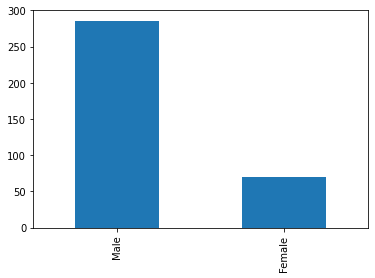

In [ ]:
test['Gender'].value_counts().plot(kind='bar')


<Axes: >

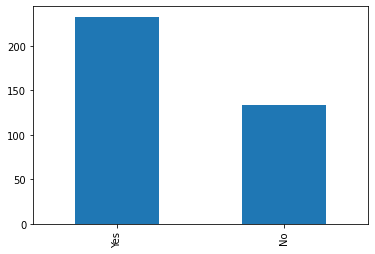

In [ ]:
test['Married'].value_counts().plot(kind='bar')


<Axes: >

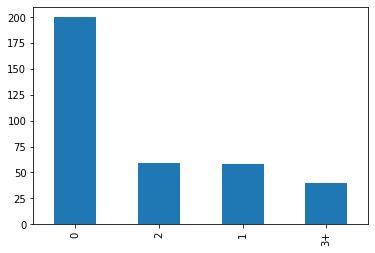

In [ ]:
test['Dependents'].value_counts().plot(kind='bar')


<Axes: ylabel='Education'>

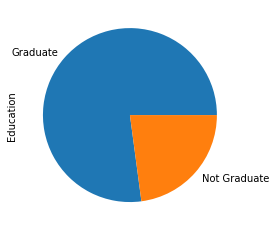

In [ ]:
test['Education'].value_counts().plot(kind='pie')


<Axes: >

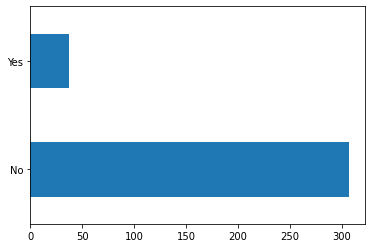

In [ ]:
test['Self_Employed'].value_counts().plot(kind='barh')


<Axes: >

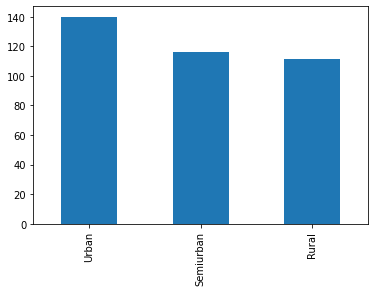

In [ ]:
test['Property_Area'].value_counts().plot(kind='bar')


<Axes: >

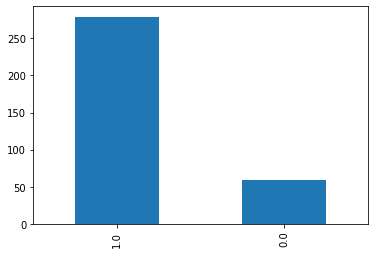

In [ ]:
test['Credit_History'].value_counts().plot(kind='bar')


Data prepartion user defined function

In [ ]:
def data_prep(data):
  data['Gender']=np.where(data['Gender'].isna(),data['Gender'].mode(dropna=True),data['Gender'])
  data['Married']=np.where(data['Married'].isna(),data['Married'].mode(dropna=True),data['Married'])
  data['Dependents']=np.where(data['Dependents'].isna(),data['Dependents'].mode(dropna=True),data['Dependents'])
  data['Dependents'].replace('3+',3,inplace=True)
  data['Dependents']=data['Dependents'].astype('int')

  data['Education']=np.where(data['Education'].isna(),data['Education'].mode(dropna=True),data['Education'])
  data['Self_Employed']=np.where(data['Self_Employed'].isna(),data['Self_Employed'].mode(dropna=True),data['Self_Employed'])
  data['Credit_History']=np.where(data['Credit_History'].isna(),data['Credit_History'].mode(dropna=True),data['Credit_History'])

  """continuous variable data prep"""
  for i in data.columns:
    if data[i].dtype=='float':
      data[i]=np.where(data[i].isna(),data[i].median(skipna=True),data[i])
  return data


In [ ]:
data_prep(test)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


Drop loanid

In [ ]:
test.drop(['Loan_ID'],axis=1,inplace=True)

Encode the variables

In [ ]:
def encode(data):
  ls=LabelEncoder()
  for i in data.columns:
    if data[i].dtype=='object':
      data[i]=ls.fit_transform(data[i])
  return data

In [ ]:
encode(test)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    int64  
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    int64  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 31.7 KB


<Axes: >

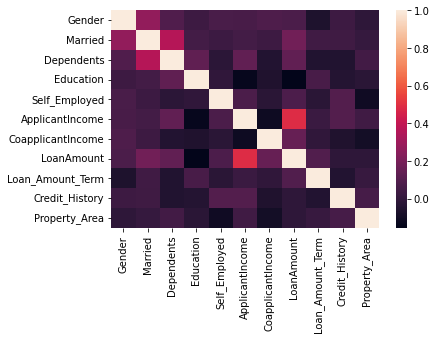

In [ ]:
sns.heatmap(test.corr())

In [ ]:
from scipy.stats import chi2_contingency
def chi_sq(var1,var2):
  table=pd.crosstab(var1,var2)
  _,P,_,_=chi2_contingency(table)
  if P<=0.05:
    print("Accept the alternate hypothesis",round(P,2))
  else:
    print("Failed to reject the null hypothesis",round(P,2))
  return table





*   Null Hypothesis:Gender and Credit history are independent
*   Alternate Hypothesis:Gender and Credit history are dependent



In [ ]:
from scipy.stats import chi2_contingency
chi_sq(test['Gender'],test['Credit_History'])

Failed to reject the null hypothesis 0.65


Credit_History,0.0,1.0
Gender,,
0,13,57
1,46,251



*   Null Hypothesis:Gender and Married are independent
*   Alternate Hypothesis:Gender and Married are dependent

In [ ]:
from scipy.stats import chi2_contingency
chi_sq(test['Gender'],test['Married'])

Accept the alternate hypothesis 0.0


Married,0,1
Gender,,
0,44,26
1,90,207



*   Null Hypothesis:Gender and Dependents are independent
*   Alternate Hypothesis:Gender and Dependents are dependent

In [ ]:
from scipy.stats import chi2_contingency
chi_sq(test['Gender'],test['Dependents'])

Failed to reject the null hypothesis 0.2


Dependents,0,1,2,3
Gender,,,,
0,45,13,6,6
1,165,45,53,34



*   Null Hypothesis:Education and Credit_history are independent
*   Alternate Hypothesis:Education and Credit_history are dependent

In [ ]:
from scipy.stats import chi2_contingency
chi_sq(test['Education'],test['Credit_History'])

Failed to reject the null hypothesis 0.5


Credit_History,0.0,1.0
Education,,
0,43,240
1,16,68


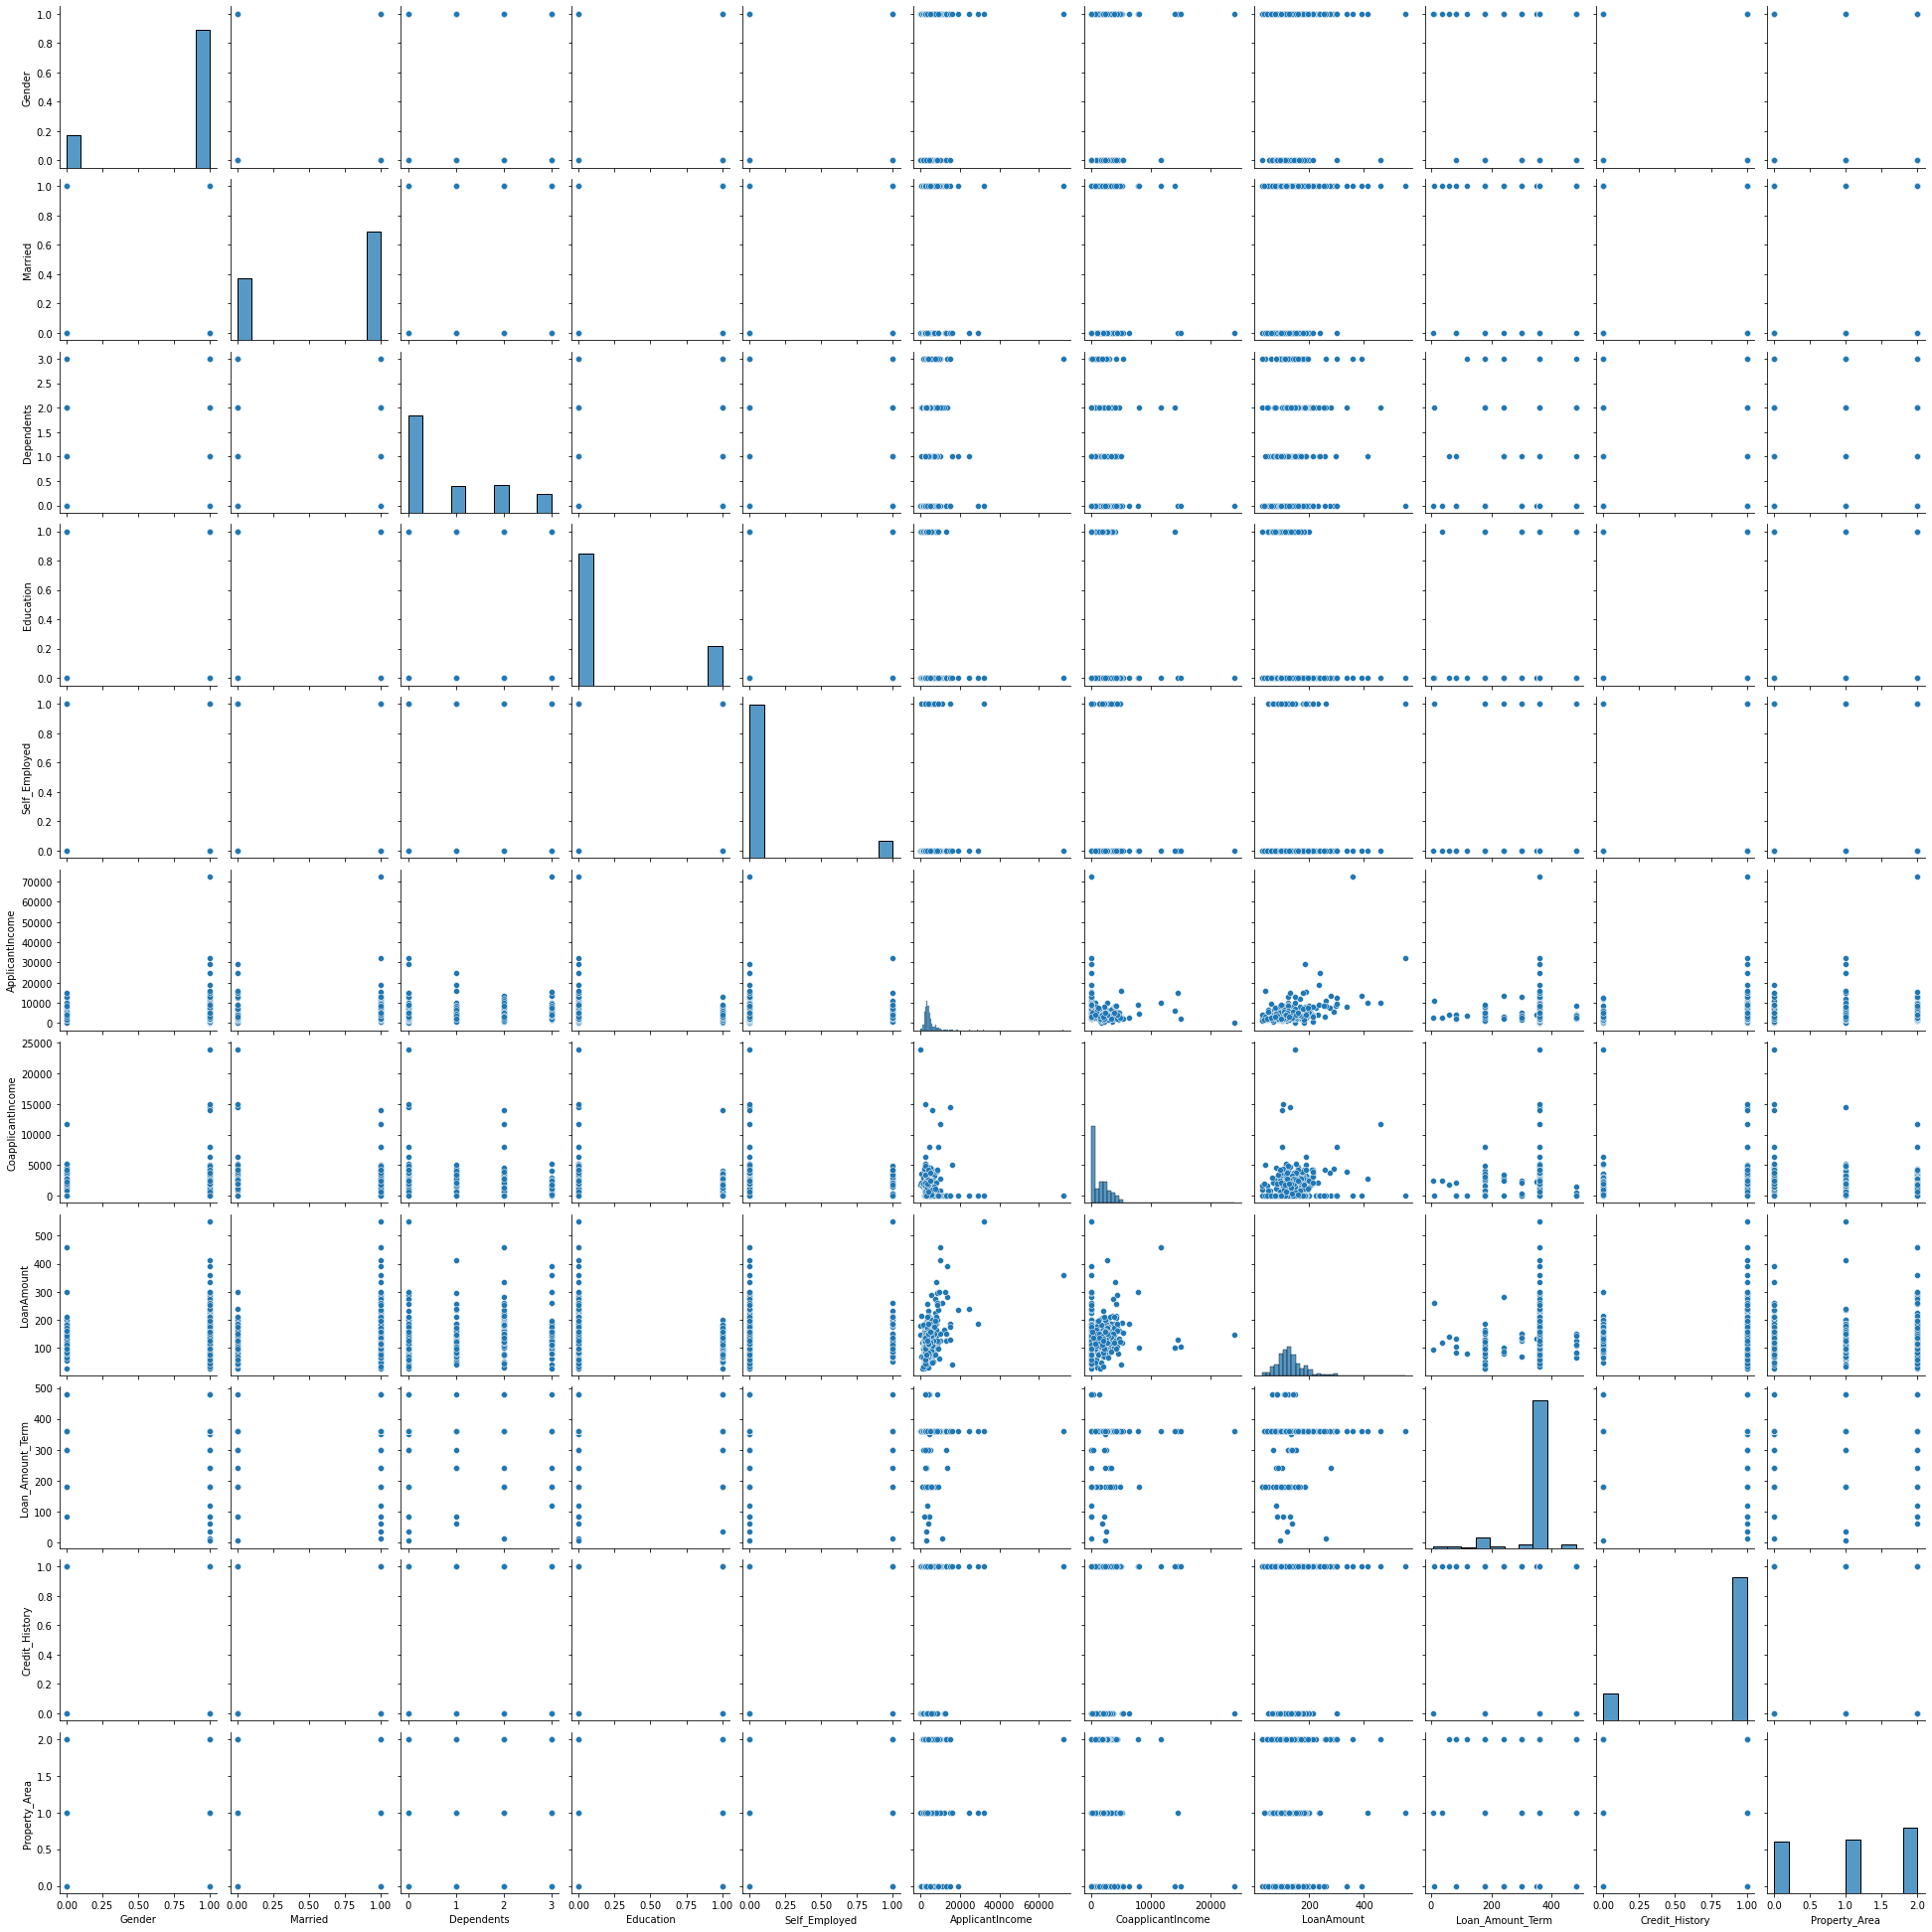

In [ ]:
sns.pairplot(test)

Multi variate analysis

Split data into train and test

In [ ]:
x=test.drop(['Credit_History'],axis=1)
y=test['Credit_History']

In [ ]:
print(x.shape)
print(y.shape)

(367, 10)
(367,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(293, 10)
(74, 10)
(293,)
(74,)


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
preds_ytrain_lr=lr.predict(x_train)
preds_ytest_lr=lr.predict(x_test)

In [ ]:
def acc_report(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cm_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  print("Accuracy",round(acc_score,2))
  print(cm_matrix)
  print(clas_rep)

In [ ]:
acc_report(y_train,preds_ytrain_lr)

Accuracy 0.83
[[  2  50]
 [  0 241]]
              precision    recall  f1-score   support

         0.0       1.00      0.04      0.07        52
         1.0       0.83      1.00      0.91       241

    accuracy                           0.83       293
   macro avg       0.91      0.52      0.49       293
weighted avg       0.86      0.83      0.76       293



In [ ]:
acc_report(y_test,preds_ytest_lr)

Accuracy 0.91
[[ 0  7]
 [ 0 67]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         7
         1.0       0.91      1.00      0.95        67

    accuracy                           0.91        74
   macro avg       0.45      0.50      0.48        74
weighted avg       0.82      0.91      0.86        74



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Biased** is the models accuracy in a trainind dataset,
variance is the difference bw the train n test is low 

high biased model is the model with 50 60 % accuracy,,,so this not considerd

Low biased and high variance --overfitting
when model is overfitting,it  tends to predict for noise present in the data too

In [ ]:
lr.coef_

array([[ 2.00057432e-01,  1.97348344e-01, -2.09923397e-01,
         7.47466200e-02,  1.36049587e-01,  2.64247414e-04,
         1.70032393e-05, -5.22200199e-03,  1.53663344e-03,
         3.03212905e-01]])

In [ ]:
lr.intercept_

array([0.12895155])

In [ ]:
lr.predict_proba(x_train)

array([[1.94763463e-01, 8.05236537e-01],
       [1.29981232e-01, 8.70018768e-01],
       [1.21856502e-01, 8.78143498e-01],
       [1.81713690e-01, 8.18286310e-01],
       [1.29051234e-01, 8.70948766e-01],
       [1.20525616e-01, 8.79474384e-01],
       [1.88045898e-01, 8.11954102e-01],
       [2.54712580e-01, 7.45287420e-01],
       [1.23934148e-01, 8.76065852e-01],
       [2.16219339e-01, 7.83780661e-01],
       [8.67832140e-02, 9.13216786e-01],
       [2.47969465e-01, 7.52030535e-01],
       [2.10794798e-01, 7.89205202e-01],
       [7.17392033e-02, 9.28260797e-01],
       [1.63460927e-01, 8.36539073e-01],
       [1.93726222e-01, 8.06273778e-01],
       [1.86300030e-01, 8.13699970e-01],
       [1.70398735e-01, 8.29601265e-01],
       [8.22265994e-04, 9.99177734e-01],
       [1.77052958e-01, 8.22947042e-01],
       [2.10277412e-01, 7.89722588e-01],
       [3.60865654e-04, 9.99639134e-01],
       [2.97097229e-01, 7.02902771e-01],
       [1.56029099e-01, 8.43970901e-01],
       [2.394565

In [ ]:
preds_ytrain_lr

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
lr.predict_proba(x_train)

array([[1.94763463e-01, 8.05236537e-01],
       [1.29981232e-01, 8.70018768e-01],
       [1.21856502e-01, 8.78143498e-01],
       [1.81713690e-01, 8.18286310e-01],
       [1.29051234e-01, 8.70948766e-01],
       [1.20525616e-01, 8.79474384e-01],
       [1.88045898e-01, 8.11954102e-01],
       [2.54712580e-01, 7.45287420e-01],
       [1.23934148e-01, 8.76065852e-01],
       [2.16219339e-01, 7.83780661e-01],
       [8.67832140e-02, 9.13216786e-01],
       [2.47969465e-01, 7.52030535e-01],
       [2.10794798e-01, 7.89205202e-01],
       [7.17392033e-02, 9.28260797e-01],
       [1.63460927e-01, 8.36539073e-01],
       [1.93726222e-01, 8.06273778e-01],
       [1.86300030e-01, 8.13699970e-01],
       [1.70398735e-01, 8.29601265e-01],
       [8.22265994e-04, 9.99177734e-01],
       [1.77052958e-01, 8.22947042e-01],
       [2.10277412e-01, 7.89722588e-01],
       [3.60865654e-04, 9.99639134e-01],
       [2.97097229e-01, 7.02902771e-01],
       [1.56029099e-01, 8.43970901e-01],
       [2.394565

**DECISION TREE IMPLEMENTATION** *italicized text*

In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
preds_dtree_train=dtree.predict(x_train)
preds_dtree_test=dtree.predict(x_test)

Log loss is to calculate the probability of error
1*(Log(class1))+(1-1)*Log(1-class2))

In [ ]:
acc_report(y_train,preds_dtree_train)

Accuracy 1.0
[[ 52   0]
 [  0 241]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00       241

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [ ]:
acc_report(y_test,preds_dtree_test)

Accuracy 0.81
[[ 2  5]
 [ 9 58]]
              precision    recall  f1-score   support

         0.0       0.18      0.29      0.22         7
         1.0       0.92      0.87      0.89        67

    accuracy                           0.81        74
   macro avg       0.55      0.58      0.56        74
weighted avg       0.85      0.81      0.83        74



Decrease the depth of the data using max depth

In [ ]:
dtree=DecisionTreeClassifier(max_depth=3,min_samples_split=5)
dtree.fit(x_train,y_train)
preds_dtree_train=dtree.predict(x_train)
preds_dtree_test=dtree.predict(x_test)

In [ ]:
acc_report(y_train,preds_dtree_train)

Accuracy 0.85
[[ 10  42]
 [  1 240]]
              precision    recall  f1-score   support

         0.0       0.91      0.19      0.32        52
         1.0       0.85      1.00      0.92       241

    accuracy                           0.85       293
   macro avg       0.88      0.59      0.62       293
weighted avg       0.86      0.85      0.81       293



In [ ]:
acc_report(y_test,preds_dtree_test)

Accuracy 0.91
[[ 2  5]
 [ 2 65]]
              precision    recall  f1-score   support

         0.0       0.50      0.29      0.36         7
         1.0       0.93      0.97      0.95        67

    accuracy                           0.91        74
   macro avg       0.71      0.63      0.66        74
weighted avg       0.89      0.91      0.89        74



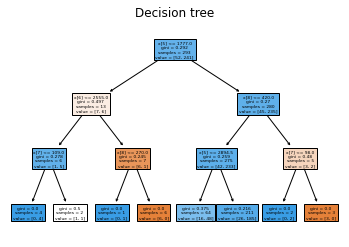

In [ ]:
from seaborn.palettes import desaturate
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure()
clf=DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)
plot_tree(clf,filled=True)
plt.title("Decision tree")
plt.show()

**SUPERVISED LEARNING-Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(verbose=1)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(verbose=1)

In [ ]:
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
acc_report(y_train,preds_rf_train)                         #low bias

Accuracy 1.0
[[ 52   0]
 [  0 241]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        52
         1.0       1.00      1.00      1.00       241

    accuracy                           1.00       293
   macro avg       1.00      1.00      1.00       293
weighted avg       1.00      1.00      1.00       293



In [ ]:
acc_report(y_test,preds_rf_test)                              #high variance

Accuracy 0.92
[[ 1  6]
 [ 0 67]]
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25         7
         1.0       0.92      1.00      0.96        67

    accuracy                           0.92        74
   macro avg       0.96      0.57      0.60        74
weighted avg       0.93      0.92      0.89        74



In [ ]:
#hyper tuning as it overfit
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(verbose=1,max_depth=3,n_estimators=21)
rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=3, n_estimators=21, verbose=1)

In [ ]:
preds_rf_train=rf.predict(x_train)
preds_rf_test=rf.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [ ]:
acc_report(y_test,preds_rf_test)    

In [ ]:
acc_report(y_train,preds_rf_train)  

Accuracy 0.83
[[  2  50]
 [  0 241]]
              precision    recall  f1-score   support

         0.0       1.00      0.04      0.07        52
         1.0       0.83      1.00      0.91       241

    accuracy                           0.83       293
   macro avg       0.91      0.52      0.49       293
weighted avg       0.86      0.83      0.76       293

